<a href="https://colab.research.google.com/github/Pimmiiiu/DW/blob/master/load_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load Titanic Data
load titanic data from github
you must use th link https://raw.githubusercontent.com/Pimmiiiu/DW/master/titanicc.csv
pls careful about delimiter,need to make sure that delimiter is not in data

In [2]:
import numpy as np
titanics = np.genfromtxt("https://raw.githubusercontent.com/Pimmiiiu/DW/master/titanicc.csv",delimiter = ";" , dtype = str,missing_values = None)
titanics.shape

(1309, 12)

In [3]:
titanics

array([['First', 'Allen, Miss. Elisabeth Walton', 'Female', ...,
        'Southampton', '2', 'Yes'],
       ['First', 'Allison, Master. Hudson Trevor', 'Male', ...,
        'Southampton', '11', 'Yes'],
       ['First', 'Allison, Miss. Helen Loraine', 'Female', ...,
        'Southampton', '', 'No'],
       ...,
       ['Third', 'Zakarian, Mr. Mapriededer', 'Male', ..., 'Cherbourg',
        '', 'No'],
       ['Third', 'Zakarian, Mr. Ortin', 'Male', ..., 'Cherbourg', '',
        'No'],
       ['Third', 'Zimmerman, Mr. Leo', 'Male', ..., 'Southampton', '',
        'No']], dtype='<U82')

In [4]:
titanics = np.delete(titanics,[1,6,7,8,9,10],1)
titanics[0,:]

array(['First', 'Female', '29.0', '0', '0', 'Yes'], dtype='<U82')

In [5]:
rows,cols = np.where(titanics == None)
print(str(len(np.unique(rows)))+" "+str(len(np.unique(cols))))

0 0


In [6]:
rows,cols = np.where(titanics == '')
print(str(len(np.unique(rows)))+" "+str(len(np.unique(cols))))

263 1


In [7]:
np.unique(cols)

array([2])

In [8]:
titanics = np.delete(titanics,2,1)
titanics[0,:]

array(['First', 'Female', '0', '0', 'Yes'], dtype='<U82')

In [9]:
passenger_class = np.unique(titanics[:,0])
passenger_class

array(['First', 'Second', 'Third'], dtype='<U82')

In [10]:
passenger_class_value = [sum(titanics[:,0]==passenger_class[0]),
                         sum(titanics[:,0]==passenger_class[1]),
                         sum(titanics[:,0]==passenger_class[2]),
                        ]
passenger_class_value

[323, 277, 709]

<BarContainer object of 3 artists>

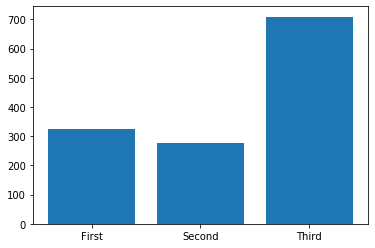

In [11]:
import matplotlib.pyplot as plt
plt.bar(passenger_class,passenger_class_value)

#EX6

In [12]:
sex = np.unique(titanics[:,1])
sex

array(['Female', 'Male'], dtype='<U82')

In [13]:
sex_value = [sum(titanics[:,1]==sex[0]),
             sum(titanics[:,1]==sex[1]),]
sex_value

[466, 843]

In [14]:
servived = np.unique(titanics[:,4])
servived

array(['No', 'Yes'], dtype='<U82')

In [15]:
servived_value = [sum(titanics[:,4]==servived[0]),
                  sum(titanics[:,4]==servived[1]),]
servived_value

[809, 500]

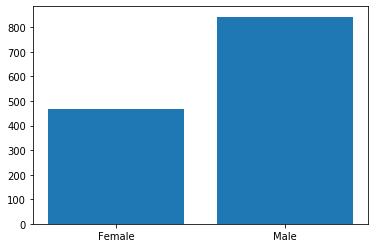

In [16]:
import matplotlib.pyplot as plt
sex_g = plt.bar(sex,sex_value)

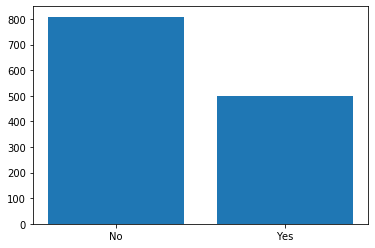

In [17]:
import matplotlib.pyplot as plt
servived_g = plt.bar(servived,servived_value)

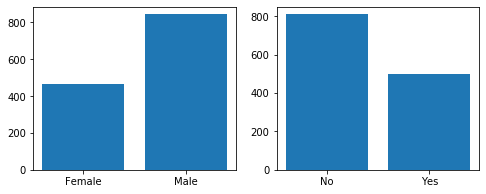

In [18]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(1,2,figsize=(8,3))
axes[0].bar(sex,sex_value)
axes[1].bar(servived,servived_value)
plt.show()
               

#String to Numerical & Label Encoder 

In [19]:
titanics[titanics == passenger_class[0]] = 0
titanics[titanics == passenger_class[1]] = 1
titanics[titanics == passenger_class[2]] = 2
titanics[titanics == sex[0]] = 0
titanics[titanics == sex[1]] = 1
titanics[titanics == servived[0]] = 0
titanics[titanics == servived[1]] = 1
titanics


array([['0', '0', '0', '0', '1'],
       ['0', '1', '1', '2', '1'],
       ['0', '0', '1', '2', '0'],
       ...,
       ['2', '1', '0', '0', '0'],
       ['2', '1', '0', '0', '0'],
       ['2', '1', '0', '0', '0']], dtype='<U82')

In [20]:
titanics = titanics.astype('float')
titanics.dtype

dtype('float64')

In [21]:
y = titanics[:,-1]
x = np.delete(titanics,-1,1)
x.shape

(1309, 4)

In [22]:
(np.min(x,1))

array([0., 0., 0., ..., 0., 0., 0.])

In [23]:
x

array([[0., 0., 0., 0.],
       [0., 1., 1., 2.],
       [0., 0., 1., 2.],
       ...,
       [2., 1., 0., 0.],
       [2., 1., 0., 0.],
       [2., 1., 0., 0.]])

In [24]:
x_norm = (x - np.min(x,0)) / (np.max(x,0) - np.min(x,0))
x_norm 

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.125     , 0.22222222],
       [0.        , 0.        , 0.125     , 0.22222222],
       ...,
       [1.        , 1.        , 0.        , 0.        ],
       [1.        , 1.        , 0.        , 0.        ],
       [1.        , 1.        , 0.        , 0.        ]])

#EX7

In [27]:
x_norm = (x - x.min(0)) / (x.max(0) - x.min(0))
x_norm 

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.125     , 0.22222222],
       [0.        , 0.        , 0.125     , 0.22222222],
       ...,
       [1.        , 1.        , 0.        , 0.        ],
       [1.        , 1.        , 0.        , 0.        ],
       [1.        , 1.        , 0.        , 0.        ]])

#EX8


In [29]:
y = titanics[:,-1]
x = titanics[:,0:4]
import numpy as np
train_index = np.random.rand(len(y)) > 0.3
sum(train_index)

901

In [30]:
test_index = train_index == False
sum(test_index)

408

In [31]:
x_train = x[train_index]
y_train = y[train_index]
x_test = x[test_index]
y_test = y[test_index]
print("Number of Class 0 ="+str(len(y) - sum(y))+" and class 1 = "+ str(sum(y)))

Number of Class 0 =809.0 and class 1 = 500.0
